# 3mo Compounded SORA pull from MAS API vs US10Y

In [4]:
import urllib.request
import json
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

URL HERE https://secure.mas.gov.sg/api/APIDescPage.aspx?resource_id=9a0bf149-308c-4bd2-832d-76c8e6cb47ed

In [5]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}

url = 'https://eservices.mas.gov.sg/api/action/datastore/search.json?resource_id=9a0bf149-308c-4bd2-832d-76c8e6cb47ed&limit=100&fields=end_of_day,comp_sora_3m&between[end_of_day]=\
2023-01,2023-05' #change this YYYY-MM start, YYYY-END mo

req = urllib.request.Request(url, headers=headers)
with urllib.request.urlopen(req) as response:
    content = response.read()

data = json.loads(content.decode())['result']['records']
df = pd.DataFrame(data)
df.set_index('end_of_day', inplace=True)
df.index = pd.to_datetime(df.index)
df['comp_sora_3m'] = df['comp_sora_3m']/100
df = df.drop('timestamp', axis=1).dropna()
df

,comp_sora_3m
end_of_day,
2023-01-03,0.030166
2023-01-04,0.030049
2023-01-05,0.030008
2023-01-06,0.029980
2023-01-09,0.030019
...,...
2023-04-17,0.035898
2023-04-18,0.035851
2023-04-19,0.035816


[*********************100%***********************]  1 of 1 completed


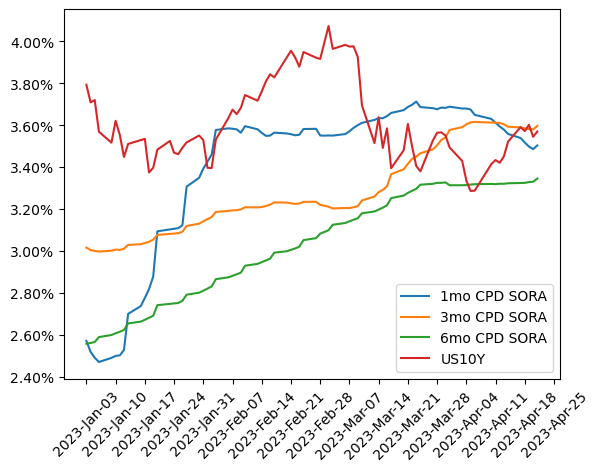

In [7]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}

comp_sora_1m = 'https://eservices.mas.gov.sg/api/action/datastore/search.json?resource_id=9a0bf149-308c-4bd2-832d-76c8e6cb47ed&limit=100&fields=end_of_day,comp_sora_1m&between[end_of_day]=2023-01,2023-05'
comp_sora_3m = 'https://eservices.mas.gov.sg/api/action/datastore/search.json?resource_id=9a0bf149-308c-4bd2-832d-76c8e6cb47ed&limit=100&fields=end_of_day,comp_sora_3m&between[end_of_day]=2023-01,2023-05'
comp_sora_6m = 'https://eservices.mas.gov.sg/api/action/datastore/search.json?resource_id=9a0bf149-308c-4bd2-832d-76c8e6cb47ed&limit=100&fields=end_of_day,comp_sora_6m&between[end_of_day]=2023-01,2023-05'
#standing_facility_deposit = 'https://eservices.mas.gov.sg/api/action/datastore/search.json?resource_id=9a0bf149-308c-4bd2-832d-76c8e6cb47ed&limit=100&fields=end_of_day,standing_facility_deposit&between[end_of_day]=2023-01,2023-05'

    
req = urllib.request.Request(comp_sora_1m, headers=headers)
with urllib.request.urlopen(req) as response:
    content1 = response.read()    

req = urllib.request.Request(comp_sora_3m, headers=headers)
with urllib.request.urlopen(req) as response:
    content3 = response.read()

req = urllib.request.Request(comp_sora_6m, headers=headers)
with urllib.request.urlopen(req) as response:
    content6 = response.read()
    
# req = urllib.request.Request(standing_facility_deposit, headers=headers)
# with urllib.request.urlopen(req) as response:
#     content_sfd = response.read()
    
    
data1 = json.loads(content1.decode())['result']['records']
df1 = pd.DataFrame(data1)
df1.set_index('end_of_day', inplace=True)
df1.index = pd.to_datetime(df1.index)
df1['comp_sora_1m'] = df1['comp_sora_1m']/100
df1 = df1.drop('timestamp', axis=1).dropna()

data3 = json.loads(content3.decode())['result']['records']
df3 = pd.DataFrame(data3)
df3.set_index('end_of_day', inplace=True)
df3.index = pd.to_datetime(df3.index)
df3['comp_sora_3m'] = df3['comp_sora_3m']/100
df3 = df3.drop('timestamp', axis=1).dropna()

data6 = json.loads(content6.decode())['result']['records']
df6 = pd.DataFrame(data6)
df6.set_index('end_of_day', inplace=True)
df6.index = pd.to_datetime(df6.index)
df6['comp_sora_6m'] = df6['comp_sora_6m']/100
df6 = df6.drop('timestamp', axis=1).dropna()


# datai = json.loads(content_sfd.decode())['result']['records']
# dfi = pd.DataFrame(datai)
# dfi.set_index('end_of_day', inplace=True)
# dfi.index = pd.to_datetime(dfi.index)
# dfi['standing_facility_deposit'] = dfi['standing_facility_deposit']
# dfi = dfi.drop('timestamp', axis=1).dropna()


ticker = "^TNX"
start_date = '2023-01-01'
end_date = '2023-05-01'

# download data from Yahoo Finance
tnx = yf.download(ticker, start=start_date, end=end_date)
tnx = tnx['Adj Close']/100
#tnx.tail()



fig, ax = plt.subplots()
#ax.plot(df_concat.index, df_concat, label="3mo CPD SORA")
ax.plot(df1.index, df1, label="1mo CPD SORA")
ax.plot(df3.index, df3, label="3mo CPD SORA")
ax.plot(df6.index, df6, label="6mo CPD SORA")
#ax.plot(dfi.index, dfi, label="Interbank O/N")
ax.plot(tnx.index, tnx, label= "US10Y")
#ax.set_xticklabels(df_concat.index, rotation=45)
ax.set_xticks(df.index)
ax.tick_params(axis='x', rotation=45)

# Set x-axis ticks to show dates at regular intervals
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d'))
ax.legend()

# Set the y-axis tick labels to be formatted as percentages
fmt = '%.0f%%' # Format y-axis ticks as percentages with 0 decimal places
yticks = mtick.PercentFormatter(xmax=1, decimals=2)
ax.yaxis.set_major_formatter(yticks)

plt.show()
